## Deep Neural Networks
Deep neural networks, also known as multilayer perceptrons, are machine learning models that learn by adjusting their weights and biases to improve the accuracy of their predictions. They consist of an input layer, hidden layers, and an output layer. They can be used for classification, regression, dimensionality reduction, and deep reinforcement learning.

In the hidden layers, the most common activation function used today is the Rectified Linear Units (ReLU), which outptus the input if it's positive and zero if it's negative. Older networks usually use the tanh function to input values to a range between -1 and 1, but it is zero centered, making it less flexible. We will be using ReLU in this notebook.

[INSERT PIC]

In this notebook, we will use a crab dataset to predict the ages of crabs. Since this is a regression task, the output layer will use the identity activation function, which outputs the input as it is. 

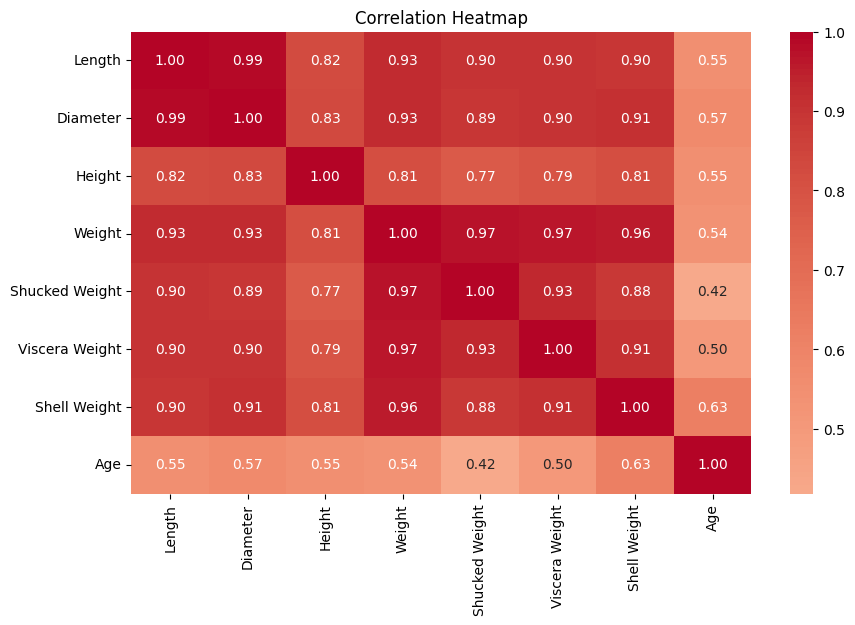

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data
data = pd.read_csv('CrabAgePrediction.csv')

# Compute correlations
corr = data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Scaling features is important in neural networks because it ensures that all inputs contribute equally, improves training stability, and helps gradient descent converge faster. Without scaling, large-valued features can dominate learning, and activation functions may behave poorly, leading to slow or unstable training. We also used sci-kit's MLPRegressor function. None of the variables have a strong correlation with age according to the correlation map, but we will carry on and see since MLPs can still capture nonlinear relationships even if linear correlation is low.

In [18]:
# Preprocessing
# One-hot encode 'Sex' if it exists
if 'Sex' in data.columns:
    data = pd.get_dummies(data, columns=['Sex'])

# Define features and target
X = data.drop('Age', axis=1)
y = data['Age']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

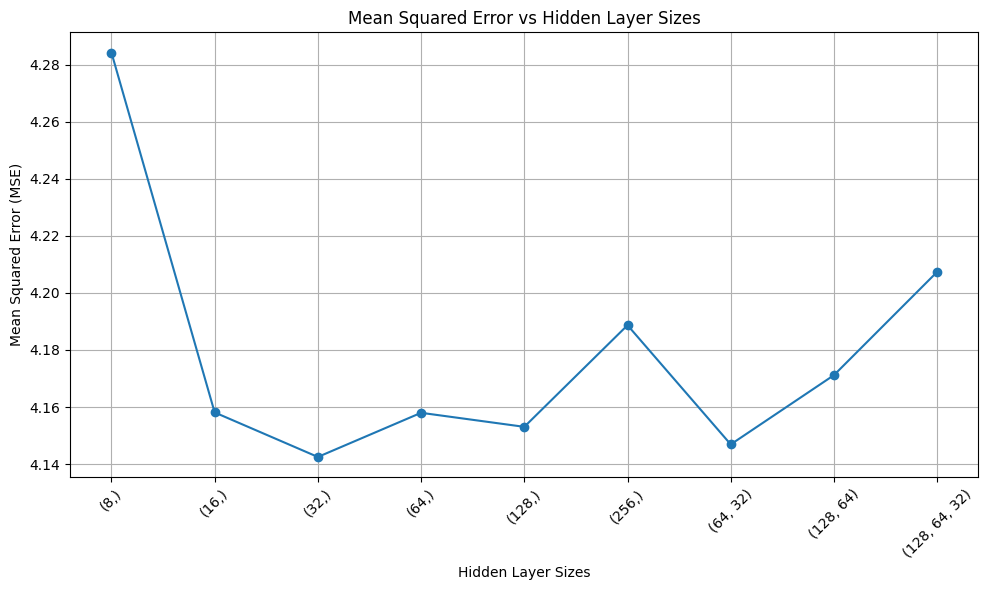

In [22]:
# Error plot over different hidden layer sizes
hidden_layer_sizes_list = [(8,), (16,), (32,), (64,), (128,), (256,), (64, 32), (128, 64), (128, 64, 32)]
mse_list = []

for hidden_layers in hidden_layer_sizes_list:
    model = MLPRegressor(
        hidden_layer_sizes=hidden_layers,
        activation='relu',
        solver='sgd',
        max_iter=500,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# Plotting the MSE for each hidden layer size
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
layer_labels = [str(layers) for layers in hidden_layer_sizes_list]
plt.plot(layer_labels, mse_list, marker='o')
plt.title("Mean Squared Error vs Hidden Layer Sizes")
plt.xlabel("Hidden Layer Sizes")
plt.ylabel("Mean Squared Error (MSE)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
# Build the MLP model
model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='sgd',
    max_iter=500,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Regression Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 4.15
Mean Absolute Error (MAE): 1.42
R² Score: 0.57


The R^2 is not amazing, but none of inputs strongly correlated with the age so this result is not unexpected.